# Машинное обучение, Лабораторная работа №3

Преподаватель: Свинцов М. В.

Выполнили: Румянцев А. А. 368731, Чебаненко Д. А. 367609, R3341, МашОб 31 1.

**Цель работы**: построить модель регрессии на основе модели k ближайших соседей и модели классификации на основе алгоритма логистической регрессии.

**Инструменты**: модели регрессии (KNeighborsRegressor) и классификации (LogisticRegression) из пакета scikit-learn.



Содержание:
Для предложенных датасетов (один для классификации, другой для регрессии) построить соответствующие модели. Для этого:
1. Воспользоваться результатами Лабораторной работы #1 по препроцессингу данных.
2. Разбить данные на обучающую и тестовую выборки (например, в соотношении 80/20).
3. Построить регрессор с различными вариантами архитектур.
4. Построить классификатор при одном наборе параметров (выбрать самостоятельно).
5. Обучить модели на обучающих частях выборки.
6. Провести сравнительную оценку качества моделей на основе тестовой выборки. Для классификатора провести более подробный анализ.


Архитектура
Замечание про архитектуры (регрессор):
1. Количество соседей n_neighbors: не менее 3 различных значе- ний. Обязательно рассмотреть случай n_neighbors = 1;
2. Вес объектов weights: рассмотреть `uniform` и `distance`;
3. Метрика: метрика городских кварталов (`cityblock`), евклидова метрика (`euclidean`) и метрика Чебышева (scipy.spatial.distance.chebyshev).
4. Используя GridSearchCV определить лучший регрессор.


Оценка качества классификации:
Логистическая регрессия — это модель, которая возвращает вероятность принадлежность классу. В связи с этим предлагается
1. Построить ROC-кривую по результатам данного классификатора.
2. Выбрать различное значение порога вероятности отделения классов (не менее 5 различных значений) и вычислить значения метрик качества классификации при различных пороговых значениях. В качестве метрик можно рассматривать: accuracy, precision, recall, F1-score.
3. (бонус) по ROC-кривой определить оптимальное значение порога классификации на основе анализа F1-score.

# Подготовка

# Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Считаем датасэт созданный в лабораторной работе №1. Поэтому данные не нужно обрабатывать.  

In [ ]:
drive.mount('/content/drive')
regression_df = pd.read_csv('drive/My Drive/new_advertising.csv')
regression_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TV,radio,newspaper,TV_radio,newspaper_share,sales
0,0.781107,0.850789,1.270548,1.063191,0.256611,22.1
1,-0.911701,0.892779,0.784008,0.018653,1.266092,10.4
2,-1.866146,1.060674,1.272195,-0.498938,2.318945,9.3
3,0.348112,0.946397,1.079221,0.848682,0.457670,18.5
4,0.531172,-0.466897,1.077274,0.090408,0.463526,12.9
...,...,...,...,...,...,...
195,-1.066943,-1.485932,-0.530505,-1.615626,0.565180,7.6
196,-0.142693,-1.234212,-1.093193,-0.847945,-0.757902,9.7
197,0.509169,-0.617400,-1.332444,-0.020763,-1.115777,12.8
198,0.998012,0.964567,1.220018,1.267962,-0.015965,25.5


##Разделение на обучающую и тестовую выборки

In [ ]:
x_reg = regression_df.drop("sales", axis=1)
y_reg = regression_df["sales"]

x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

##Гиперпараметры и обучение регрессора

`n_neighbors` - как и сказано в названии количество соседей на которые мы обращаем внимание, если n = 1, то алгоритм полагается только на выбор ближайшего соседа, что может сработать при хорошо очищенных данных без выбросов.

`weights` - принцип голосования, `uniform` - все голоса равны, `distance` - чем ближе, тем существенней голос

`metric` - метрики расстояния

In [ ]:

reg_grid = {
        'n_neighbors': [1, 3, 5, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['cityblock', 'euclidean', 'chebyshev']
    }

knn = KNeighborsRegressor()
scoring = make_scorer(mean_squared_error, greater_is_better=False)
knn_grid = GridSearchCV(knn, reg_grid, cv=5, scoring = scoring, n_jobs=-1)
knn_grid.fit(x_reg_train, y_reg_train)

best_reg = knn_grid.best_estimator_
y_reg_pred = best_reg.predict(x_reg_test)
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
reg_r2 = r2_score(y_reg_test, y_reg_pred)

print("Лучший регрессор:", best_reg)
print("Среднеквадратичная ошибка на тестовой выборке:", reg_mse)
print("Коэффициент детерминации (R2):", reg_r2)

Лучший регрессор: KNeighborsRegressor(metric='cityblock', n_neighbors=3, weights='distance')
Среднеквадратичная ошибка на тестовой выборке: 0.8907503152249531
Коэффициент детерминации (R2): 0.9717791857834644


## Все модели

In [ ]:
results = pd.DataFrame(knn_grid.cv_results_)

results_summary = results[[
    'param_n_neighbors', 'param_weights', 'param_metric',
    'mean_test_score', 'std_test_score'
]]

results_summary = results_summary.rename(columns={
    'param_n_neighbors': 'n_neighbors',
    'param_weights': 'weights',
    'param_metric': 'metric',
    'mean_test_score': 'mean_mse',
    'std_test_score': 'std_mse'
})

esults_summary = results_summary.sort_values('mean_mse')

results_with_predictions = results_summary.copy()


test_mse = []
test_r2 = []

for model_idx in range(len(knn_grid.cv_results_['params'])):

    model = knn_grid.estimator.set_params(**knn_grid.cv_results_['params'][model_idx])

    model.fit(x_reg_train, y_reg_train)

    y_pred = model.predict(x_reg_test)

    mse = mean_squared_error(y_reg_test, y_pred)

    r2 = r2_score(y_reg_test, y_pred)

    test_mse.append(mse)
    test_r2.append(r2)

results_with_predictions['test_mse'] = test_mse
results_with_predictions['test_r2'] = test_r2
results_with_predictions = results_with_predictions.sort_values('test_r2', ascending=False)
print(results_with_predictions)

    n_neighbors   weights     metric  mean_mse   std_mse  test_mse   test_r2
5             5  distance  cityblock -1.191320  0.523941  0.834818  0.973551
3             3  distance  cityblock -1.147360  0.452248  0.890750  0.971779
2             3   uniform  cityblock -1.306410  0.522034  0.915417  0.970998
13            5  distance  euclidean -1.292926  0.490914  0.964461  0.969444
4             5   uniform  cityblock -1.429087  0.567649  1.018740  0.967724
12            5   uniform  euclidean -1.515695  0.544252  1.077010  0.965878
11            3  distance  euclidean -1.269753  0.336480  1.124705  0.964367
10            3   uniform  euclidean -1.419458  0.355537  1.202361  0.961907
19            3  distance  chebyshev -1.311766  0.387851  1.408878  0.955364
18            3   uniform  chebyshev -1.447667  0.454712  1.459500  0.953760
7            10  distance  cityblock -1.430899  0.409251  1.479577  0.953124
21            5  distance  chebyshev -1.624940  0.450899  1.489498  0.952810

Как мы можем заметить лучший результат на тестовой выборке показала модель под индексом 5 с параметрами `distance`, `cityblock`, `n = 5`, но она не является лучшей по grid_search так как имодель номер 3 показала лучший результат на фолдах, но справилась с тестами чуть хуже.

In [ ]:
class_df = pd.read_csv('drive/My Drive/new_heart.csv')
class_df

,oldpeak,age_heart_rate_reserve,physical_fitness,sex,cp,exang,slope,ca,thal,target
0,1.087338,-0.606321,0.298233,1,3,0,0,0,1,1
1,2.122573,2.301531,-1.006925,1,2,0,0,0,2,1
2,0.310912,1.566541,-0.715457,0,1,0,2,0,2,1
3,-0.206705,0.374341,-1.108028,1,1,0,2,0,2,1
4,-0.379244,-0.002645,-0.809770,0,0,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,-0.724323,-0.833661,1.122947,0,0,1,1,0,3,0
299,0.138373,0.066187,-0.342777,1,3,0,1,0,3,0
300,2.036303,-0.990186,0.560774,1,0,0,1,2,3,0
301,0.138373,-1.022528,1.085560,1,0,1,1,1,3,0


In [ ]:
x_class = class_df.drop("target", axis=1)
y_class = class_df["target"]

x_class_train, x_class_test, y_class_train, y_class_test = train_test_split(x_class, y_class, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(x_class_train, y_class_train)

LogisticRegression()

In [ ]:
probs = model.predict_proba(x_class_test)[:, 1]

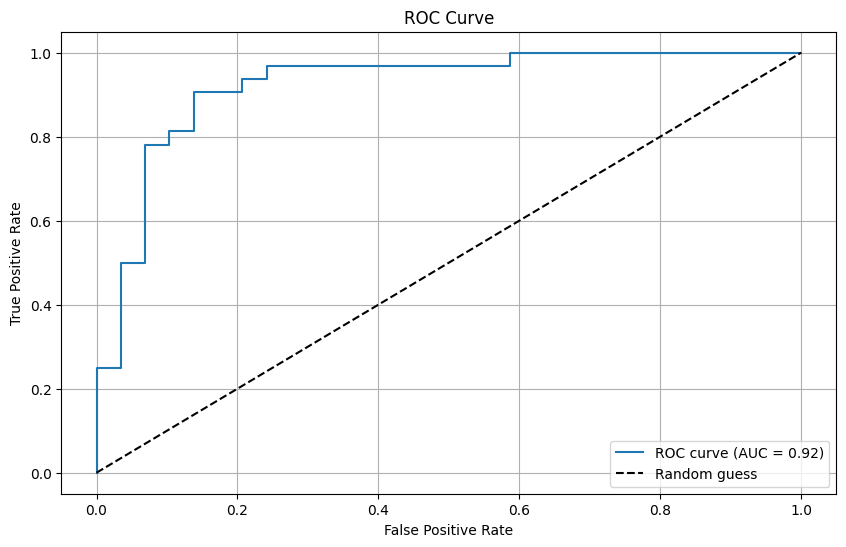

In [ ]:
fpr, tpr, thresholds = roc_curve(y_class_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
thresholds_to_evaluate = [0.2, 0.4, 0.5, 0.6, 0.8]

for threshold in thresholds_to_evaluate:
    predictions = (probs >= threshold).astype(int)
    acc = accuracy_score(y_class_test, predictions)
    prec = precision_score(y_class_test, predictions)
    rec = recall_score(y_class_test, predictions)
    f1 = f1_score(y_class_test, predictions)
    print(f"thr = {threshold:.2f}\t\t acc = {acc:.2f}\t\t prec = {prec:.2f}\t\t rec = {rec:.2f}\t\t f1 = {f1:.2f}")

thr = 0.20		 acc = 0.87		 prec = 0.85		 rec = 0.91		 f1 = 0.88
thr = 0.40		 acc = 0.89		 prec = 0.88		 rec = 0.91		 f1 = 0.89
thr = 0.50		 acc = 0.89		 prec = 0.88		 rec = 0.91		 f1 = 0.89
thr = 0.60		 acc = 0.85		 prec = 0.87		 rec = 0.84		 f1 = 0.86
thr = 0.80		 acc = 0.72		 prec = 0.94		 rec = 0.50		 f1 = 0.65


Как мы можем заметить, Roc кривая находиться выше случайного предсказания, следовательно модель обучилась корректно. Также пиковый `acc` и `f1 score` находится при пороге 0.5.